<a href="https://colab.research.google.com/github/gaojing33/Stat-Data-Science/blob/main/Waste_generation_within_the_EU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression equation: Per Capita Waste = 6.19 * Higher Education Population + 356.29
R-squared value: 0.16


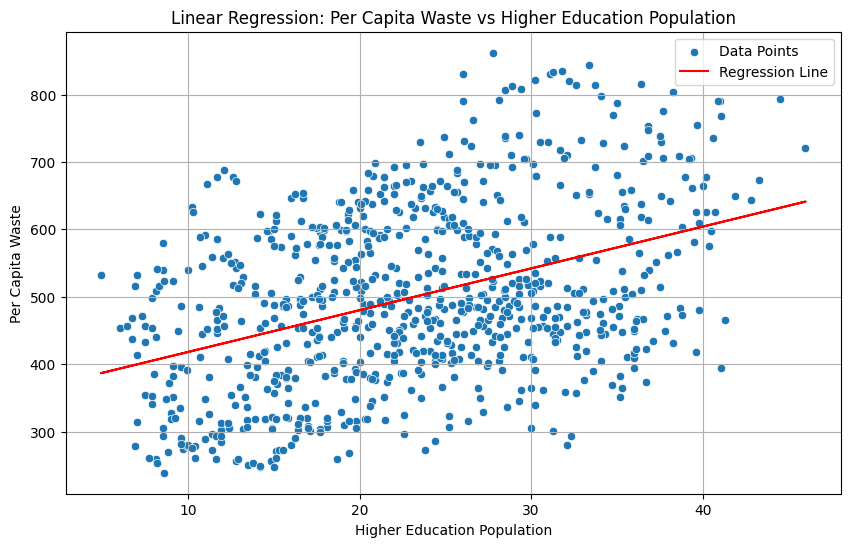

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data from the CSV file
file_path = '/content/Merged_Higher_Education_and_Waste_Data.csv'
df = pd.read_csv(file_path)

# Step 3: Data cleaning - Drop rows with missing values in either column
df_clean = df.dropna(subset=['Higher Education Population', 'Per Capita Waste'])

# Step 4: Define the independent (X) and dependent (Y) variables for the regression
X = df_clean['Higher Education Population'].values.reshape(-1, 1)  # Reshape for sklearn
Y = df_clean['Per Capita Waste'].values

# Step 5: Create the linear regression model and fit it
model = LinearRegression()
model.fit(X, Y)

# Step 6: Get the regression parameters
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, Y)

print(f'Regression equation: Per Capita Waste = {slope:.2f} * Higher Education Population + {intercept:.2f}')
print(f'R-squared value: {r_squared:.2f}')

# Step 7: Plot the regression line with the data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Higher Education Population', y='Per Capita Waste', data=df_clean, label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Higher Education Population')
plt.ylabel('Per Capita Waste')
plt.title('Linear Regression: Per Capita Waste vs Higher Education Population')
plt.legend()
plt.grid(True)
plt.show()

